##Introduction
Children are heavily impacted by their environment, whether it is their home or physical location. In an ideal world, all students would have equal access to education and opportunities. It is important to determine which socioeconomic variables may be influencing a student’s road to success to work towards possible solutions on small and large scales. In this study, we will determine if the state a student is located in along with different socioeconomic factors will have an impact on their ACT performance using data from the National Center for Education Statistics and EdGap.


# Import libraries

In [319]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns
# set the plotting style
sns.set_style("whitegrid")

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

##Load State ACT score data

In [320]:
from google.colab import files
uploaded = files.upload()

Saving tabn226.60.xls to tabn226.60 (3).xls


Read the excel table

In [321]:
statedf = pd.read_excel("tabn226.60.xls")

Examine the data

In [322]:
statedf.head()

,"Table 226.60. Average ACT scores and percentage of graduates taking the ACT, by state: 2017 and 2021",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,State,2017,NaN,NaN,NaN,NaN,2021,NaN,NaN,NaN,NaN,Percent taking ACT\1\,NaN
1,NaN,NaN,Subject-area scores,NaN,NaN,NaN,NaN,Subject-area scores,NaN,NaN,NaN,NaN,NaN
2,NaN,Composite score,English score,Mathematics score,Reading score,Science score,Composite score,English score,Mathematics score,Reading score,Science score,2017,2021.000000
3,1,2,3,4,5,6,7,8,9,10,11,12,13.000000
4,United States,21,20.3,20.7,21.4,21,20.3,19.6,19.9,20.9,20.4,56.334392,35.301865


In [323]:
statedf.tail()

,"Table 226.60. Average ACT scores and percentage of graduates taking the ACT, by state: 2017 and 2021",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
54,Wisconsin,20.5,19.7,20.4,20.6,20.9,20,18.9,19.9,20.3,20.4,100,96.0
55,Wyoming,20.2,19.4,19.8,20.8,20.6,19.8,18.6,19.4,20.7,20.2,100,91.0
56,\1\Members of the graduating class who had tak...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,NOTE: The minimum score on the ACT is 1 and th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,"SOURCE: ACT, The Condition of College and Care...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [324]:
statedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Table 226.60. Average ACT scores and percentage of graduates taking the ACT, by state: 2017 and 2021  57 non-null     object 
 1   Unnamed: 1                                                                                            55 non-null     object 
 2   Unnamed: 2                                                                                            55 non-null     object 
 3   Unnamed: 3                                                                                            54 non-null     object 
 4   Unnamed: 4                                                                                            54 n

In [325]:
statedf.columns

Index(['Table 226.60. Average ACT scores and percentage of graduates taking the ACT, by state: 2017 and 2021',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [326]:
statedf.shape

(59, 13)

Remove unnecessary rows

In [327]:
statedf = pd.read_excel("tabn226.60.xls", skiprows=4, skipfooter=3, engine='xlrd')

In [328]:
statedf.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,United States,21.0,20.3,20.7,21.4,21.0,20.3,19.6,19.9,20.9,20.4,56.334392,35.301865
1,Alabama,19.2,18.9,18.4,19.7,19.4,18.7,18.4,18.0,19.2,18.8,100.000000,100.000000
2,Alaska,19.8,18.7,19.8,20.4,19.9,20.6,19.4,20.5,21.6,20.6,65.000000,16.000000
3,Arizona,19.7,18.6,19.8,20.1,19.8,19.8,18.6,19.8,20.3,19.9,62.000000,35.000000
4,Arkansas,19.4,18.9,19.0,19.7,19.5,19.0,18.6,18.3,19.3,19.2,100.000000,99.000000


In [329]:
statedf.tail(10)

,1,2,3,4,5,6,7,8,9,10,11,12,13
42,South Dakota,21.8,20.7,21.5,22.3,22.0,21.6,20.5,21.2,22.4,21.9,80.0,55.0
43,Tennessee,19.8,19.5,19.2,20.1,19.9,19.1,18.7,18.5,19.7,19.1,100.0,100.0
44,Texas,20.7,19.5,20.7,21.1,20.9,20.1,18.9,20.0,20.6,20.3,45.0,23.0
45,Utah,20.3,19.5,19.9,20.8,20.6,20.6,19.7,20.1,21.3,20.8,100.0,86.0
46,Vermont,23.6,23.3,23.1,24.4,23.2,24.7,24.2,23.4,26.2,24.5,29.0,4.0
47,Virginia,23.8,23.5,23.3,24.6,23.5,25.5,25.5,24.5,26.5,25.1,29.0,9.0
48,Washington,21.9,20.9,21.9,22.1,22.0,23.6,22.9,23.1,24.4,23.4,29.0,7.0
49,West Virginia,20.4,20.0,19.4,21.2,20.5,20.8,20.6,19.6,21.8,20.8,69.0,30.0
50,Wisconsin,20.5,19.7,20.4,20.6,20.9,20.0,18.9,19.9,20.3,20.4,100.0,96.0
51,Wyoming,20.2,19.4,19.8,20.8,20.6,19.8,18.6,19.4,20.7,20.2,100.0,91.0


In [330]:
statedf.columns

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

Rename the columns

In [331]:
statedf.rename(columns={
    1: "State",
    2: "Composite Score 2017",
    3: "English 2017",
    4: "Math 2017",
    5: "Reading 2017",
    6: "Science 2017",
    7: "Composite Score 2021",
    8: "English 2021",
    9: "Math 2021",
    10: "Reading 2021",
    11: "Science 2021",
    12: "Percent Taking 2017",
    13: "Percent Taking 2021",
}, inplace=True)

In [332]:
statedf.columns

Index(['State', 'Composite Score 2017', 'English 2017', 'Math 2017',
       'Reading 2017', 'Science 2017', 'Composite Score 2021', 'English 2021',
       'Math 2021', 'Reading 2021', 'Science 2021', 'Percent Taking 2017',
       'Percent Taking 2021'],
      dtype='object')

In [333]:
statedf.head()

,State,Composite Score 2017,English 2017,Math 2017,Reading 2017,Science 2017,Composite Score 2021,English 2021,Math 2021,Reading 2021,Science 2021,Percent Taking 2017,Percent Taking 2021
0,United States,21.0,20.3,20.7,21.4,21.0,20.3,19.6,19.9,20.9,20.4,56.334392,35.301865
1,Alabama,19.2,18.9,18.4,19.7,19.4,18.7,18.4,18.0,19.2,18.8,100.000000,100.000000
2,Alaska,19.8,18.7,19.8,20.4,19.9,20.6,19.4,20.5,21.6,20.6,65.000000,16.000000
3,Arizona,19.7,18.6,19.8,20.1,19.8,19.8,18.6,19.8,20.3,19.9,62.000000,35.000000
4,Arkansas,19.4,18.9,19.0,19.7,19.5,19.0,18.6,18.3,19.3,19.2,100.000000,99.000000


Tidy the data. Dropping unnecessary columns

In [334]:
statedf.drop(columns=['English 2017', 'Math 2017',
       'Reading 2017', 'Science 2017', 'English 2021',
       'Math 2021', 'Reading 2021', 'Science 2021', 'Percent Taking 2017',
       'Percent Taking 2021'], inplace=True)

statedf.dropna(axis=1, how='all', inplace=True)

# Check
print(statedf.columns)

Index(['State', 'Composite Score 2017', 'Composite Score 2021'], dtype='object')


Melting the data into a tidy format

In [335]:
tidystatedf = statedf.melt(
    id_vars=["State"],
    var_name="Subject_Year",
    value_name="Score"
)

In [336]:
tidystatedf[['Subject', 'Year']] = tidystatedf['Subject_Year'].str.rsplit(' ', n=1, expand=True)
tidystatedf.drop(columns='Subject_Year', inplace=True)

In [337]:
tidystatedf['State'].unique()

array(['   United States ', 'Alabama ', 'Alaska ', 'Arizona ',
       'Arkansas ', 'California ', 'Colorado ', 'Connecticut ',
       'Delaware ', 'District of Columbia ', 'Florida ', 'Georgia ',
       'Hawaii ', 'Idaho ', 'Illinois ', 'Indiana ', 'Iowa ', 'Kansas ',
       'Kentucky ', 'Louisiana ', 'Maine ', 'Maryland ', 'Massachusetts ',
       'Michigan ', 'Minnesota ', 'Mississippi ', 'Missouri ', 'Montana ',
       'Nebraska ', 'Nevada ', 'New Hampshire ', 'New Jersey ',
       'New Mexico ', 'New York ', 'North Carolina ', 'North Dakota ',
       'Ohio ', 'Oklahoma ', 'Oregon ', 'Pennsylvania ', 'Rhode Island ',
       'South Carolina ', 'South Dakota ', 'Tennessee ', 'Texas ',
       'Utah ', 'Vermont ', 'Virginia ', 'Washington ', 'West Virginia ',
       'Wisconsin ', 'Wyoming '], dtype=object)

Save the cleaned data

In [338]:

statedf.to_csv("cleaned_state_data.csv", index=False)

In [339]:
from google.colab import files
files.download("cleaned_state_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Load clean data

## Load the data

In [340]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/brian-fischer/education/refs/heads/main/education_clean.csv'
)

In [341]:
df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level,charter
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High,Yes
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High,No
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High,No
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High,No
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High,No


Load the state data

In [342]:
statedf = pd.read_csv("cleaned_state_data.csv")

#Join the data frames

In [343]:
df.rename(columns={"state": "State"}, inplace=True)

In [344]:
df['State'].unique()

array(['DE', 'FL', 'GA', 'IL', 'IN', 'KY', 'LA', 'MA', 'MI', 'MO', 'NJ',
       'NY', 'NC', 'OH', 'PA', 'TN', 'TX', 'WA', 'WI', 'WY'], dtype=object)

"Map" the data to make state names consistent amongst the joined datasets.

In [345]:
state_map = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico',
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota',
    'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania',
    'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'District of Columbia'
}
df['State'] = df['State'].map(state_map)

print(df['State'].unique())

['Delaware' 'Florida' 'Georgia' 'Illinois' 'Indiana' 'Kentucky'
 'Louisiana' 'Massachusetts' 'Michigan' 'Missouri' 'New Jersey' 'New York'
 'North Carolina' 'Ohio' 'Pennsylvania' 'Tennessee' 'Texas' 'Washington'
 'Wisconsin' 'Wyoming']


In [346]:
df.tail()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,State,zip_code,school_type,school_level,charter
7222,560530200294,0.034549,0.590780,0.720077,64891.0,18.5,0.232156,2016-2017,Wyoming,82901,Regular School,High,No
7223,560569000311,0.069538,0.633860,0.808841,44603.0,22.3,0.083871,2016-2017,Wyoming,82833,Regular School,High,No
7224,560569500360,0.035159,0.764566,0.776570,44896.0,21.5,0.184829,2016-2017,Wyoming,82801,Regular School,High,No
7225,560576200324,0.063877,0.670532,0.879324,92134.0,19.7,0.112583,2016-2017,Wyoming,82935,Regular School,High,No
7226,560583000335,0.033553,0.736511,0.821128,73849.0,21.8,0.163701,2016-2017,Wyoming,83001,Regular School,High,No


I chose to do an inner join to keep data from all of the states that were included in the education dataset. I also associated each composite score from 2017 and 2021 with the states given in the education dataset.

In [347]:
merged_df = pd.merge(statedf, df, on="State", how="inner")

In [348]:
merged_df.tail()

,State,Composite Score 2017,Composite Score 2021,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,zip_code,school_type,school_level,charter


In [349]:
merged_df.head()

,State,Composite Score 2017,Composite Score 2021,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,zip_code,school_type,school_level,charter


Data is now joined and tidy. Export data

In [350]:

merged_df.to_csv("cleaned_merged_data.csv", index=False)

# Exploratory data analysis

### Examine distributions and relationships



Plot the correlation matrix of the numerical variables in the training data to explore relationships between the variables.

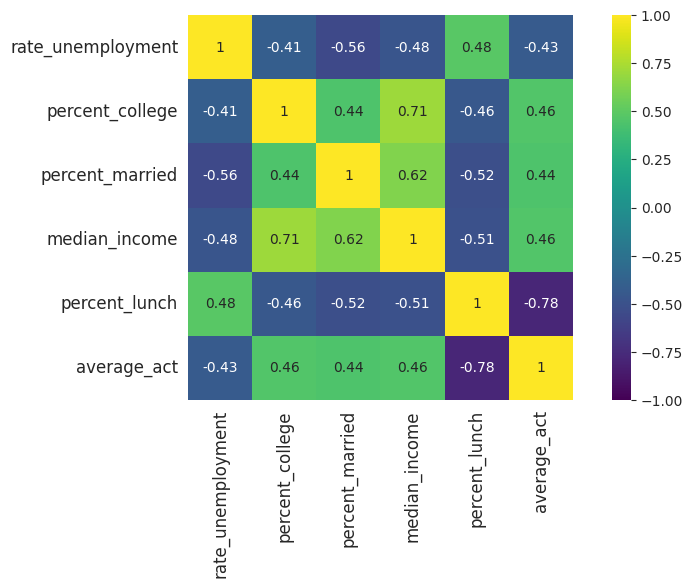

In [351]:
predictor_variables = ['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch', 'State', 'charter']

numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = df[numerical_predictors + ["average_act"]].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

##### Make pair plots to explore relationships between the variables

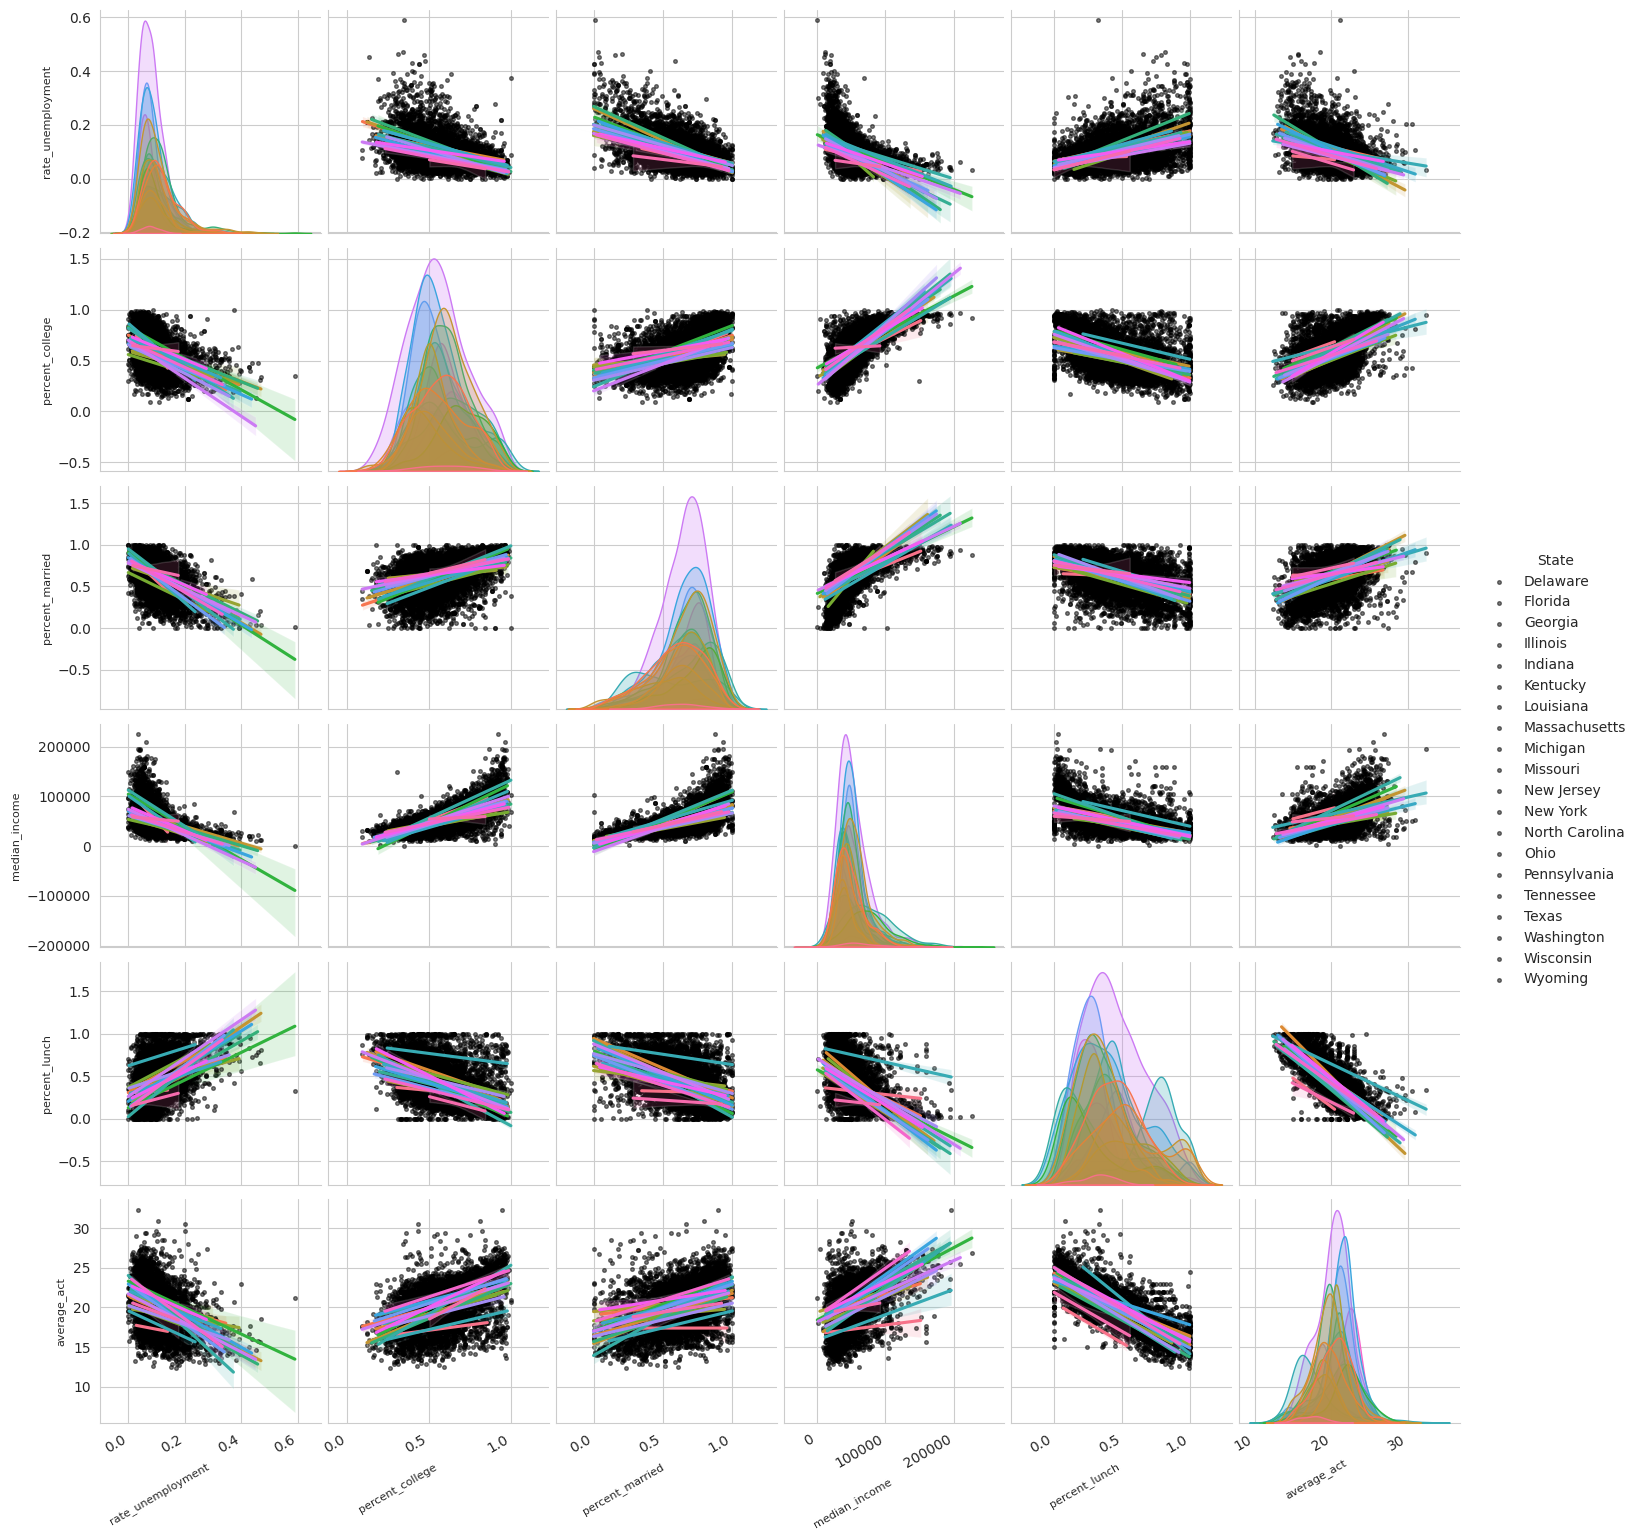

In [352]:
fig = sns.pairplot(
    data=df,
    vars=numerical_predictors + ['average_act'],
    hue='State',
    kind="reg",
    plot_kws={"scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

### Identify outliers

We can use the interquartile range to identify outliers. This is also evident in boxplots of the data. Median income is on a very different scale than the other predictors, so we will make two plots to explore the data.

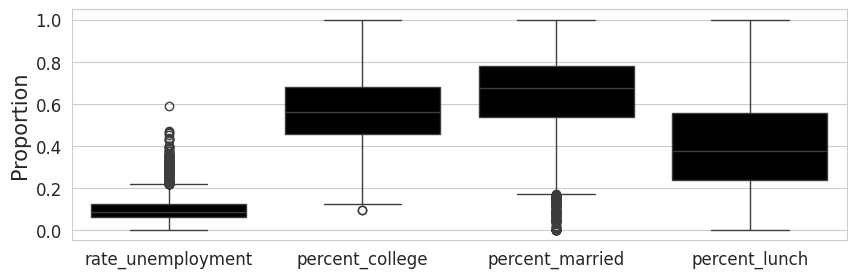

In [353]:
plt.figure(figsize=(10,3))

fractions = list(numerical_predictors)
fractions.remove('median_income')

sns.boxplot(data=df[fractions], color='k')

plt.ylabel('Proportion', fontsize=15)

plt.tick_params(labelsize=12)

plt.show()

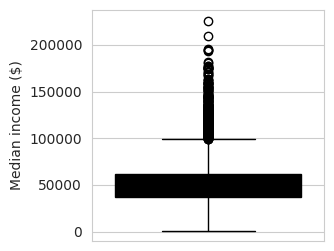

In [354]:
plt.figure(figsize=(3,3))

sns.boxplot(data=df, y='median_income', color='k')

plt.ylabel('Median income ($)')

plt.show()

## Summary

1.  The numerical predictors are related to `average_act`. The relationships appear roughly linear.

2.  The numerical predictors are correlated with each other, suggesting that not all predictors will be necessary.

3.  Some variables have skewed distributions, suggesting that transformations of input variables might be useful.

4. There are outliers in `rate_unemployment`, `percent_college`, `percent_married` and `median_income`. None of these are obviously incorrect values; they likely reflect skewed distributions. We may consider applying something like a log transformation to these predictors as we explore different models.

5. The relationships are similar across charter and non-charter schools, but might be significantly different.

# Modeling

### Single input models

#### Median income

##### Plot the regression line and the scatter plot

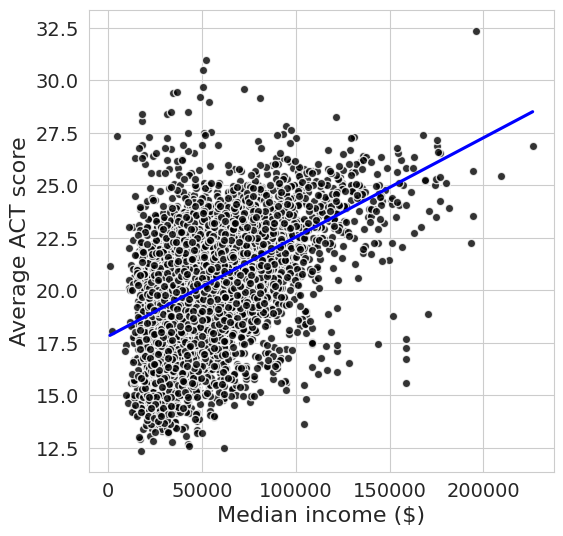

In [355]:
plt.figure(figsize=(6, 6))

sns.regplot(data=df,
            x='median_income',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

# Add axis labels
plt.xlabel('Median income ($)', fontsize=16)
plt.ylabel('Average ACT score', fontsize=16)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()

##### Fit the simple linear regression model

In [356]:
model_median_income = smf.ols(formula='average_act ~ median_income', data=df).fit()

##### Display the fit summary: check the sign and significance of the coefficients

In [357]:
print(model_median_income.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     1934.
Date:                Thu, 23 Oct 2025   Prob (F-statistic):               0.00
Time:                        05:26:51   Log-Likelihood:                -16043.
No. Observations:                7227   AIC:                         3.209e+04
Df Residuals:                    7225   BIC:                         3.210e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.8026      0.063    284.794

##### Numerical assessment of fit accuracy

Compute the R-squared

In [358]:
model_median_income.rsquared

np.float64(0.21118648979301036)

Compute the RMSE

In [359]:
y_hat = model_median_income.predict()

In [360]:
np.sqrt(mean_squared_error(df['average_act'], y_hat)).round(3)

np.float64(2.228)

Compute the mean absolute error

In [361]:
mean_absolute_error(df['average_act'], y_hat)

1.7129386980688535

##### Use a residual plot for graphical assessment of model fit

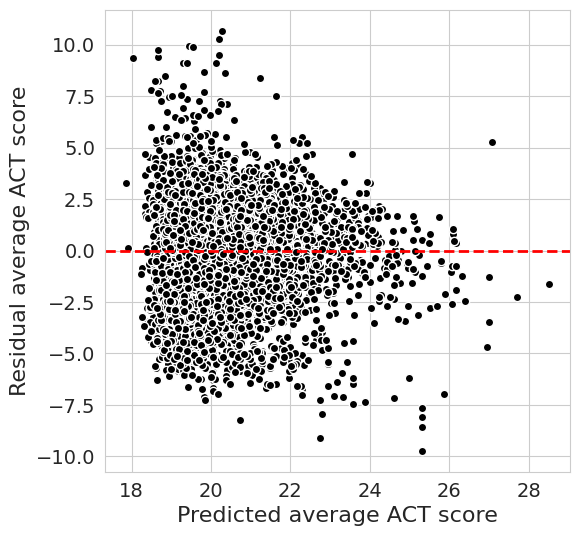

In [362]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat, model_median_income.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

##### Try a quadratic model. Plot the regression curves and the scatter plot

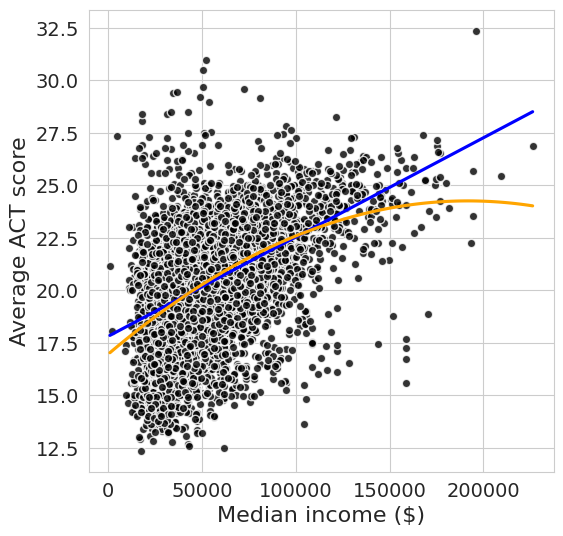

In [363]:
plt.figure(figsize=(6, 6))

sns.regplot(data=df,
            x='median_income',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

sns.regplot(data=df,
            x='median_income',
            y='average_act',
            order=2,
            color='orange',
            ci=False,
            scatter=False)

# Add axis labels
plt.xlabel('Median income ($)', fontsize=16)
plt.ylabel('Average ACT score', fontsize=16)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()

##### Fit a quadratic linear regression model

In [364]:
model_median_income2 = smf.ols(
    formula='average_act ~ median_income + I(median_income**2)',
    data=df).fit()

##### Display the fit summary

In [365]:
print(model_median_income2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     1013.
Date:                Thu, 23 Oct 2025   Prob (F-statistic):               0.00
Time:                        05:26:53   Log-Likelihood:                -16007.
No. Observations:                7227   AIC:                         3.202e+04
Df Residuals:                    7224   BIC:                         3.204e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                16.94

##### Assess the model significance

In [366]:
model_median_income2.pvalues

,0
Intercept,0.000000e+00
median_income,2.631899e-99
I(median_income ** 2),1.395848e-17


In [367]:
anova_lm(model_median_income, model_median_income2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,7225.0,35865.012794,0.0,NaN,NaN,NaN
1,7224.0,35505.105960,1.0,359.906834,73.227974,1.395848e-17


##### Assess the model accuracy

Compute the mean absolute error

In [368]:
mean_absolute_error(df['average_act'], model_median_income2.predict())

1.6972389257619824

##### Compare the quadratic model accuracy to the first order model

In [369]:
mean_absolute_error(df['average_act'], model_median_income2.predict())

1.6972389257619824

In [370]:
mean_absolute_error(df['average_act'], model_median_income.predict())

1.7129386980688535

# Multiple linear regression

##State

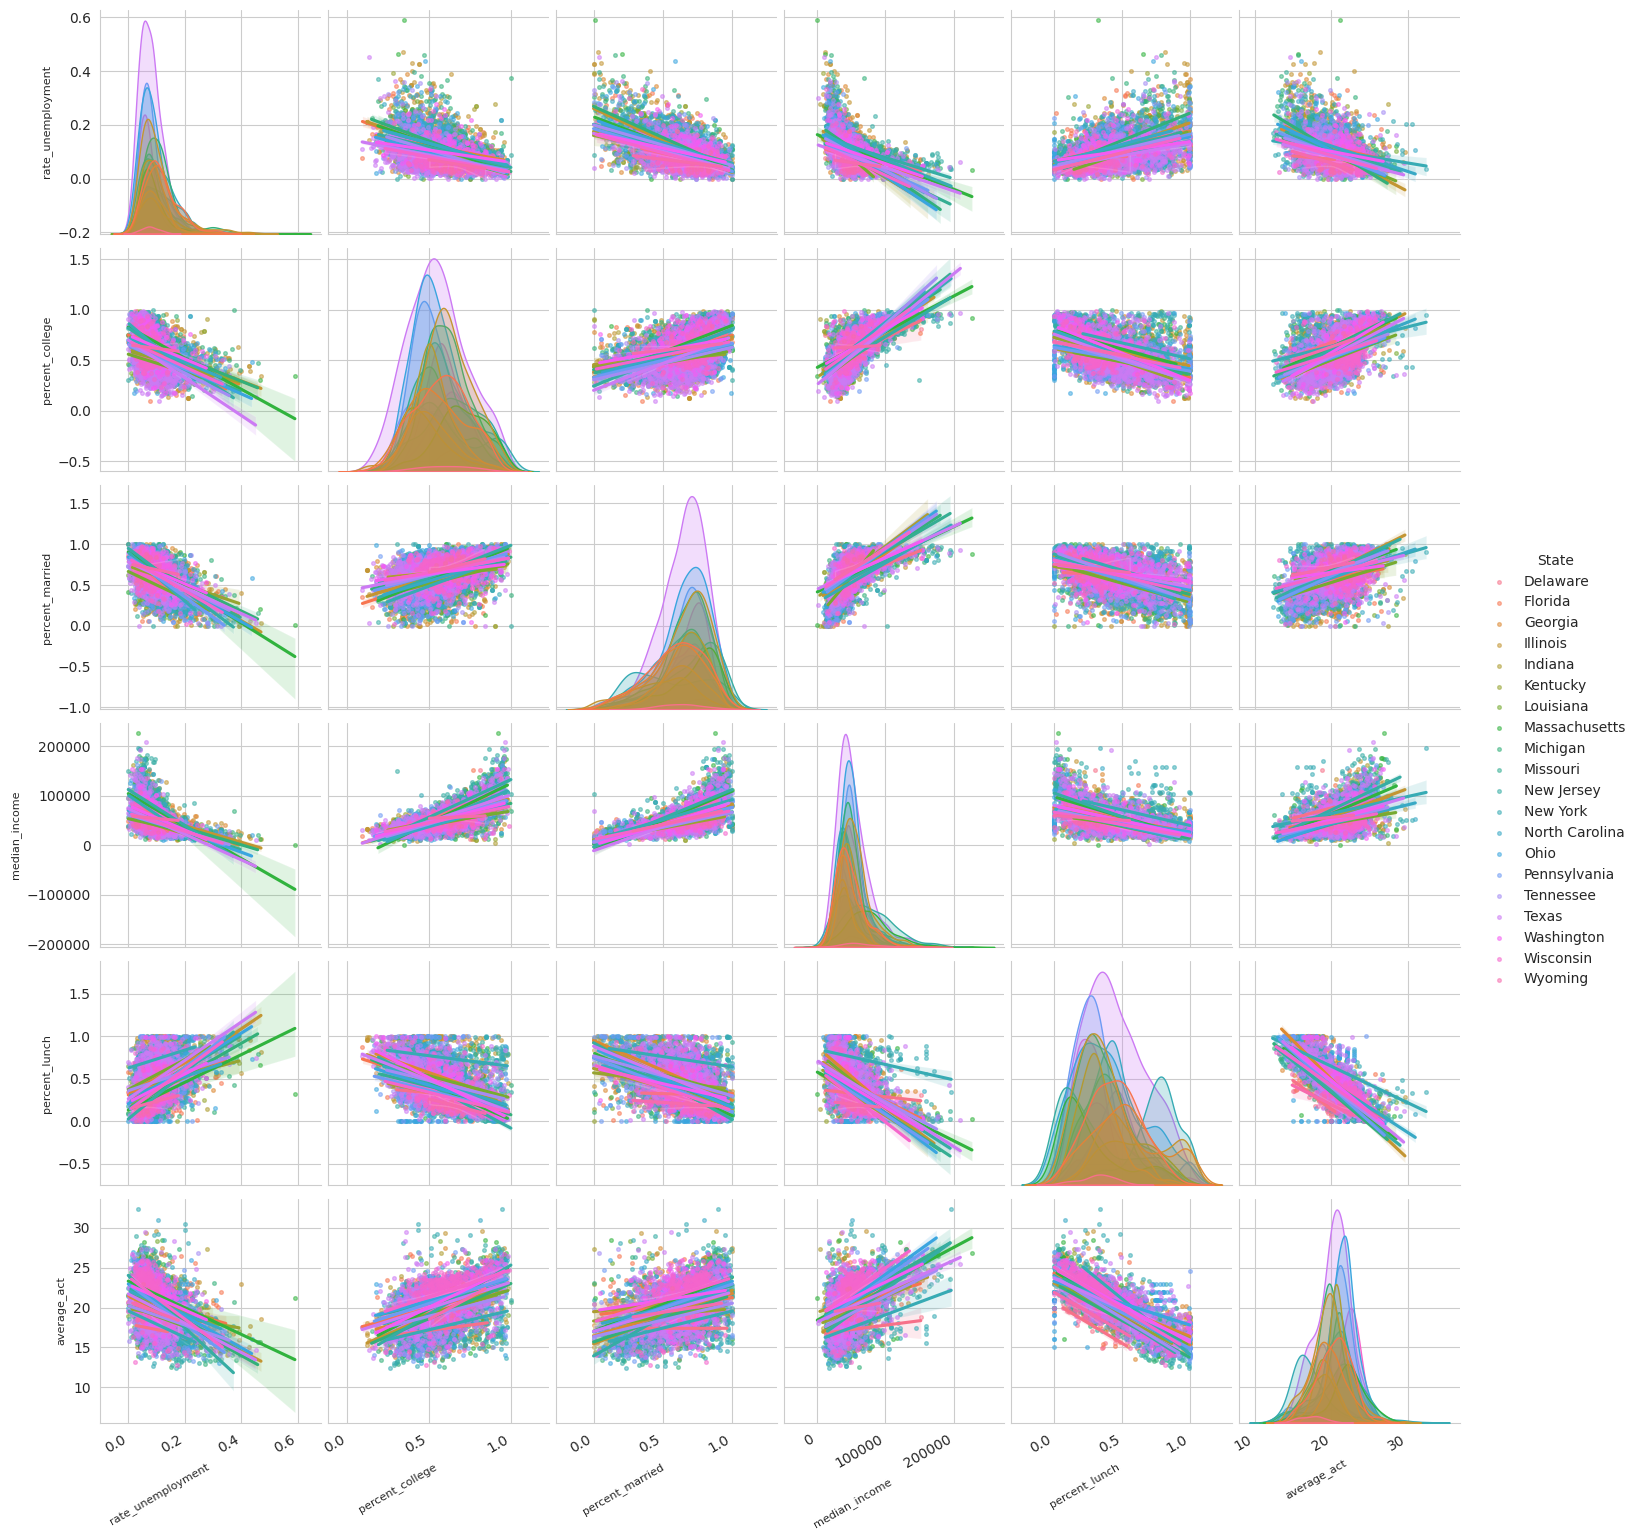

In [ ]:
fig = sns.pairplot(
    data=df,
    vars=numerical_predictors + ['average_act'],
    hue='State',
    kind="reg",
    plot_kws={"scatter_kws": {"alpha": 0.5, "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'State':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

In [ ]:
model_state = smf.ols(
    formula='average_act ~ rate_unemployment + percent_college + percent_lunch + C(State)',
    data=df).fit()

In [ ]:
print(model_state.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     693.1
Date:                Thu, 23 Oct 2025   Prob (F-statistic):               0.00
Time:                        05:57:59   Log-Likelihood:                -12793.
No. Observations:                7227   AIC:                         2.563e+04
Df Residuals:                    7204   BIC:                         2.579e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

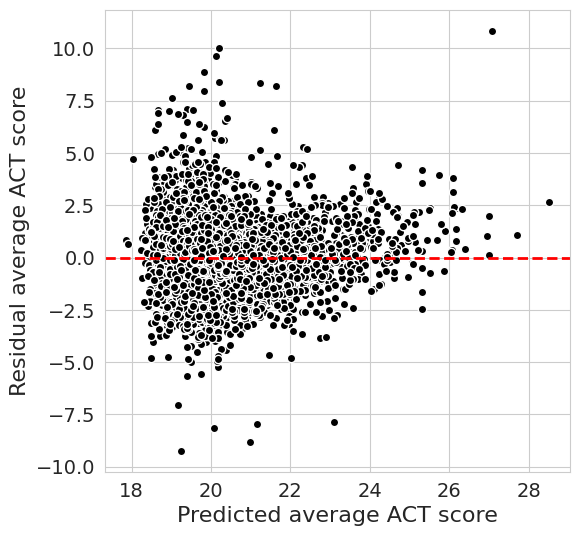

In [ ]:
plt.figure(figsize=(6,6))

plt.plot(y_hat, model_state.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

In [ ]:
model_state2 = smf.ols(formula='average_act ~ (rate_unemployment + percent_college + percent_lunch) * C(State)', data=df).fit()

In [ ]:
print(model_state2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     219.6
Date:                Thu, 23 Oct 2025   Prob (F-statistic):               0.00
Time:                        05:59:03   Log-Likelihood:                -12449.
No. Observations:                7227   AIC:                         2.506e+04
Df Residuals:                    7147   BIC:                         2.561e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

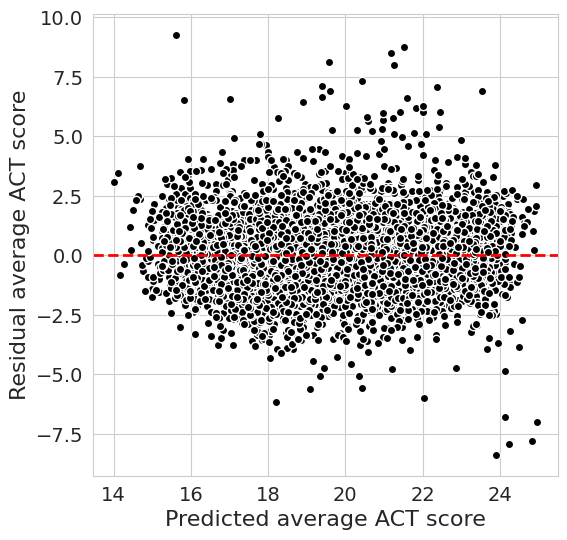

In [ ]:
plt.figure(figsize=(6,6))

plt.plot(y_hat, model_state2.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

In [ ]:
anova_lm(model_state, model_state2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,7204.0,14587.976956,0.0,NaN,NaN,NaN
1,7147.0,13264.174936,57.0,1323.802019,12.513872,5.437743e-108


In [ ]:
mean_absolute_error(df['average_act'], model_state2.predict())

0.9967179199652629

In [ ]:
mean_absolute_error(df['average_act'], model_state.predict())

1.0277533349716133

Fit the multiple linear regression model using all socioeconomic variables as predictors.

In [ ]:
model = smf.ols(
    formula='average_act ~ rate_unemployment + percent_college + percent_married + State + median_income + percent_lunch',
    data=df).fit()

##### Print the summary

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     2438.
Date:                Thu, 23 Oct 2025   Prob (F-statistic):               0.00
Time:                        05:59:24   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.667e+04
Df Residuals:                    7221   BIC:                         2.671e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.6972      0.13

##### Use a residual plot for graphical assessment of model fit

In [ ]:
y_hat = model.predict()

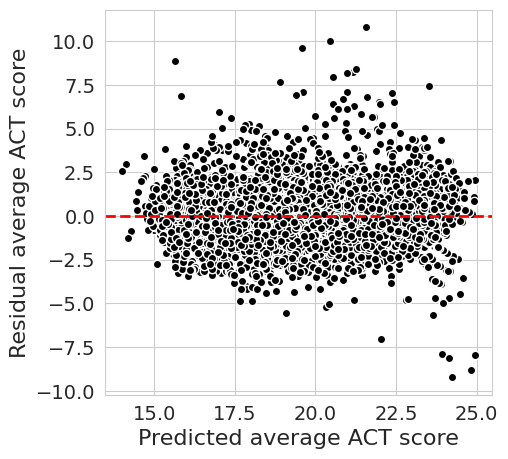

In [ ]:
plt.figure(figsize=(5, 5))

plt.plot(y_hat, model.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

##### Compute the mean absolute error

In [ ]:
mean_absolute_error(df['average_act'], model.predict())

1.0278330737229213

## Summary

1. The multiple linear regression model with all socioeconomic predictors can predict ACT scores with an average error of roughly 1 point using these predictors.

2. The residual plot suggests that there will be limited improvement from adding transformations of these predictors.

3. Not all predictors have significant coefficients.

4. Adding predictors to the model may improve the performance.

# Fit a reduced model with the significant predictors

In [409]:
model_reduced = smf.ols(
    formula='average_act ~ rate_unemployment + State + percent_college + percent_lunch',
    data=df).fit()

##### Print the summary

In [410]:
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     693.1
Date:                Thu, 23 Oct 2025   Prob (F-statistic):               0.00
Time:                        06:00:17   Log-Likelihood:                -12793.
No. Observations:                7227   AIC:                         2.563e+04
Df Residuals:                    7204   BIC:                         2.579e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

##### Use a residual plot for graphical assessment of model fit

In [388]:
y_hat = model_reduced.predict()

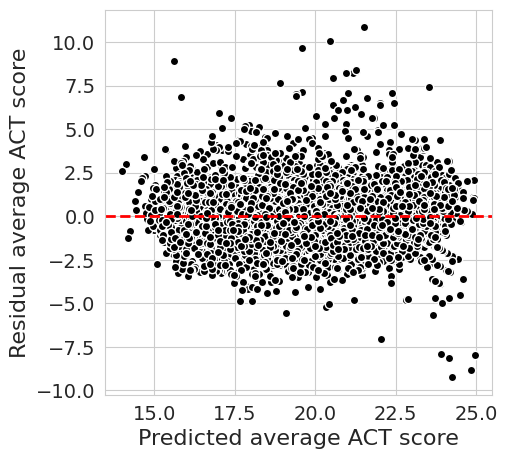

In [389]:
plt.figure(figsize=(5, 5))

plt.plot(y_hat, model_reduced.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

##### Compute the mean absolute error

In [390]:
mean_absolute_error(df['average_act'], model_reduced.predict())

1.0277533349716133

## Summary

# Scaling

##### Scale the predictor variables in the reduced model to have mean 0 and standard deviation 1 and add them to the data frame

Since State is a categorical variable, it was not able to be scaled.

In [411]:
predictor_variables = ['rate_unemployment', 'percent_college', 'percent_lunch']

In [412]:
scaled_columns = [var + '_normalized' for var in predictor_variables]

print(scaled_columns)

['rate_unemployment_normalized', 'percent_college_normalized', 'percent_lunch_normalized']


In [413]:
scaler = StandardScaler().fit(df[predictor_variables])

In [414]:
df[scaled_columns] = scaler.transform(df[predictor_variables])

##### Check the mean and standard deviation of the transformed data.

In [415]:
df[scaled_columns].agg(['mean', 'std']).round(3)

,rate_unemployment_normalized,percent_college_normalized,percent_lunch_normalized
mean,-0.0,-0.0,0.0
std,1.0,1.0,1.0


##### Fit the multiple linear regression model with the normalized predictors

In [416]:
model_normalized = smf.ols(
    formula='average_act ~ rate_unemployment_normalized + percent_college_normalized + percent_lunch_normalized',
    data=df).fit()

##### Print the summary

In [417]:
print(model_normalized.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     4063.
Date:                Thu, 23 Oct 2025   Prob (F-statistic):               0.00
Time:                        06:05:38   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7223   BIC:                         2.669e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

##### Compare the accuracy between the original and normalized models

In [418]:
mae_normalized = mean_absolute_error(df['average_act'], model_normalized.predict())
mae_reduced = mean_absolute_error(df['average_act'], model_reduced.predict())

r2_normalized = model_normalized.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({'Mean Absolute Error': [mae_normalized, mae_reduced],
              'R-squared': [r2_normalized, r2_reduced]},
              index=['normalized model', 'reduced model']).round(4)

,Mean Absolute Error,R-squared
normalized model,1.1455,0.6279
reduced model,1.0278,0.6792


## Summary

1. The percent of students at a school receiving free or reduced price lunch was the strongest predictor in the scaled analysis

# Conclusion

The analysis shows that college entrance test scores (ACT and SAT) are related to socioeconomic variables as well as location (State)

The location a student is in is shown to create a statistically significant difference in what their ACT score will be. This is showed by the reduced plot analysis.

In particular, using only the percent of students at a school receiving free or reduced price lunch, we can predict ACT scores to within a single point, on average.

The percent of students at a school receiving free or reduced price lunch was the strongest predictor in this analysis. It was also the only variable measured for students at the school, rather than for the neighborhood. It is an open question how important the other predictors would be if they were measured for the students at the school, rather than for the neighborhood.

